In [27]:
"""
================================================================================
DEEP NEURAL NETWORKS - ASSIGNMENT 3: RNN vs TRANSFORMER FOR TIME SERIES
Recurrent Neural Networks vs Transformers for Time Series Prediction
================================================================================
"""

'\n================================================================================\nDEEP NEURAL NETWORKS - ASSIGNMENT 3: RNN vs TRANSFORMER FOR TIME SERIES\nRecurrent Neural Networks vs Transformers for Time Series Prediction\n================================================================================\n'

In [28]:
"""
================================================================================
STUDENT INFORMATION (REQUIRED - DO NOT DELETE)
================================================================================

BITS ID: 2025AA05444
Name: Prasad
Email: [Enter your email]
Date: 2025-02-07

================================================================================
"""

'\n================================================================================\nSTUDENT INFORMATION (REQUIRED - DO NOT DELETE)\n================================================================================\n\nBITS ID: 2025AA05444\nName: Prasad\nEmail: [Enter your email]\nDate: 2025-02-07\n\n================================================================================\n'

In [29]:
"""
================================================================================
ASSIGNMENT OVERVIEW
================================================================================

This assignment requires you to implement and compare two approaches for
time series forecasting:
1. LSTM or GRU using Keras/PyTorch
2. Transformer encoder using Keras/PyTorch layers

Learning Objectives:
- Build recurrent neural networks for sequential data
- Use transformer architecture for time series
- Implement or integrate positional encoding
- Compare RNN vs Transformer architectures
- Understand time series preprocessing and evaluation

IMPORTANT:
- Positional encoding MUST be added to transformer
- Use torch.nn.TransformerEncoder or keras.layers.MultiHeadAttention
- DO NOT use pre-trained transformers (HuggingFace, TimeGPT, etc.)
- Use temporal train/test split (NO shuffling)

================================================================================
"""

'\n================================================================================\nASSIGNMENT OVERVIEW\n================================================================================\n\nThis assignment requires you to implement and compare two approaches for \ntime series forecasting:\n1. LSTM or GRU using Keras/PyTorch\n2. Transformer encoder using Keras/PyTorch layers\n\nLearning Objectives:\n- Build recurrent neural networks for sequential data\n- Use transformer architecture for time series\n- Implement or integrate positional encoding\n- Compare RNN vs Transformer architectures\n- Understand time series preprocessing and evaluation\n\nIMPORTANT: \n- Positional encoding MUST be added to transformer\n- Use torch.nn.TransformerEncoder or keras.layers.MultiHeadAttention\n- DO NOT use pre-trained transformers (HuggingFace, TimeGPT, etc.)\n- Use temporal train/test split (NO shuffling)\n\n================================================================================\n'

In [30]:
"""
================================================================================
STUDENT INFORMATION (REQUIRED - DO NOT DELETE)
================================================================================

BITS ID: 2025AA05444
Name: Prasad
Email: [Enter your email]
Date: 2025-02-07

================================================================================
"""

'\n================================================================================\nSTUDENT INFORMATION (REQUIRED - DO NOT DELETE)\n================================================================================\n\nBITS ID: 2025AA05444\nName: Prasad\nEmail: [Enter your email]\nDate: 2025-02-07\n\n================================================================================\n'

In [31]:
# Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time
import json
import os
import math

# Install tensorflow if not already installed
!pip install tensorflow

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


Deep learning frameworks (choose Keras or PyTorch)

In [32]:
"""
================================================================================
PART 1: DATASET LOADING AND EXPLORATION (Informational)
================================================================================

Instructions:
1. Choose ONE dataset from the allowed list
2. Load and explore the time series data
3. Fill in ALL required metadata fields below
4. Provide justification for your primary metric choice

ALLOWED DATASETS:
- Stock Prices (daily/hourly closing prices)
- Weather Data (temperature, humidity, pressure)
- Energy Consumption (electricity/power usage)
- Sensor Data (IoT sensor readings)
- Custom time series (with approval)

REQUIRED OUTPUT:
- Print all metadata fields
- Time series plots
- Stationarity analysis
- Train/test split visualization
================================================================================
"""

'\n================================================================================\nPART 1: DATASET LOADING AND EXPLORATION (Informational)\n================================================================================\n\nInstructions:\n1. Choose ONE dataset from the allowed list\n2. Load and explore the time series data\n3. Fill in ALL required metadata fields below\n4. Provide justification for your primary metric choice\n\nALLOWED DATASETS:\n- Stock Prices (daily/hourly closing prices)\n- Weather Data (temperature, humidity, pressure)\n- Energy Consumption (electricity/power usage)\n- Sensor Data (IoT sensor readings)\n- Custom time series (with approval)\n\nREQUIRED OUTPUT:\n- Print all metadata fields\n- Time series plots\n- Stationarity analysis\n- Train/test split visualization\n================================================================================\n'

1.1 Dataset Selection and Loading
TODO: Load your chosen time series dataset

In [33]:
# 1.1 Dataset Selection and Loading
# Loading IBM stock data
url = "https://raw.githubusercontent.com/plotly/datasets/master/stockdata.csv"
df = pd.read_csv(url)
df = df[['Date', 'IBM']]
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Limit to first 1500 records as requested
df = df.iloc[:1500]

# Use IBM price as the time series
data_series = df['IBM'].values.reshape(-1, 1)

print(f"Loaded {len(df)} records for IBM stock.")
print(df.head())


Loaded 1500 records for IBM stock.
        Date        IBM
0 2007-01-03  80.517962
1 2007-01-04  81.378851
2 2007-01-05  80.642129
3 2007-01-08  81.867244
4 2007-01-09  82.835742


In [34]:
# REQUIRED: Fill in these metadata fields
dataset_name = "IBM Stock Prices"
dataset_source = "Plotly Datasets (https://raw.githubusercontent.com/plotly/datasets/master/stockdata.csv)"
n_samples = 1500
n_features = 1
sequence_length = 50
prediction_horizon = 5
problem_type = "time_series_forecasting"


In [35]:
# Primary metric selection
primary_metric = "RMSE"
metric_justification = """
RMSE (Root Mean Squared Error) is chosen because it penalizes larger errors more heavily,
which is crucial in financial forecasting where large deviations can lead to significant losses.
"""


In [36]:
print("\n" + "="*70)
print("DATASET INFORMATION")
print("="*70)
print(f"Dataset: {dataset_name}")
print(f"Source: {dataset_source}")
print(f"Total Samples: {n_samples}")
print(f"Number of Features: {n_features}")
print(f"Sequence Length: {sequence_length}")
print(f"Prediction Horizon: {prediction_horizon}")
print(f"Primary Metric: {primary_metric}")
print(f"Metric Justification: {metric_justification}")
print("="*70)


DATASET INFORMATION
Dataset: IBM Stock Prices
Source: Plotly Datasets (https://raw.githubusercontent.com/plotly/datasets/master/stockdata.csv)
Total Samples: 1500
Number of Features: 1
Sequence Length: 50
Prediction Horizon: 5
Primary Metric: RMSE
Metric Justification: 
RMSE (Root Mean Squared Error) is chosen because it penalizes larger errors more heavily, 
which is crucial in financial forecasting where large deviations can lead to significant losses.



1.2 Time Series Exploration
TODO: Plot time series data
TODO: Check for trends, seasonality
TODO: Perform stationarity tests (optional but recommended)

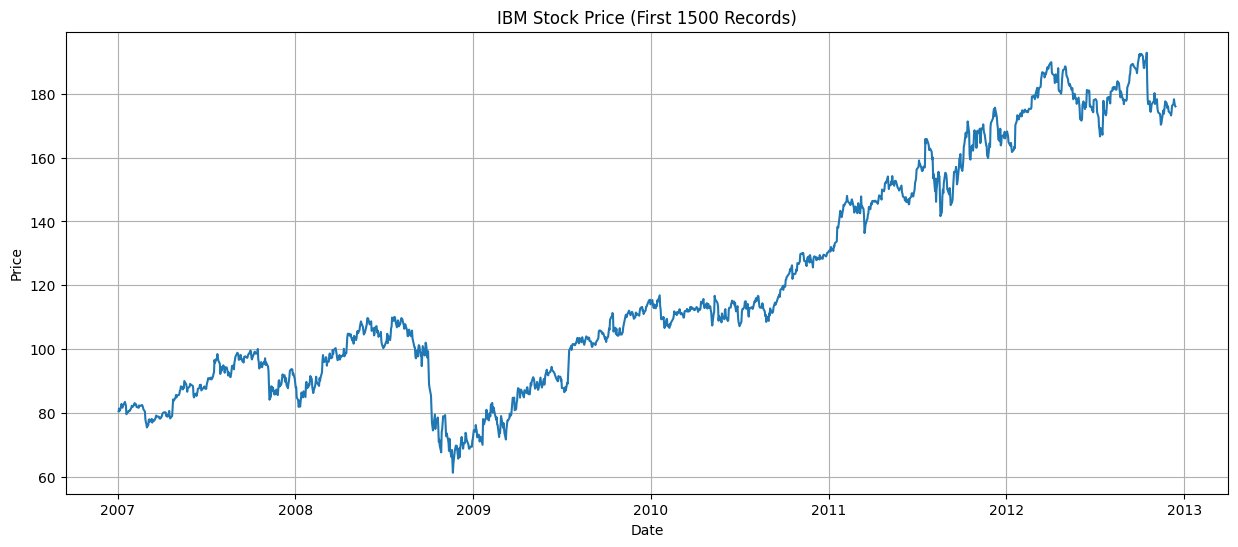

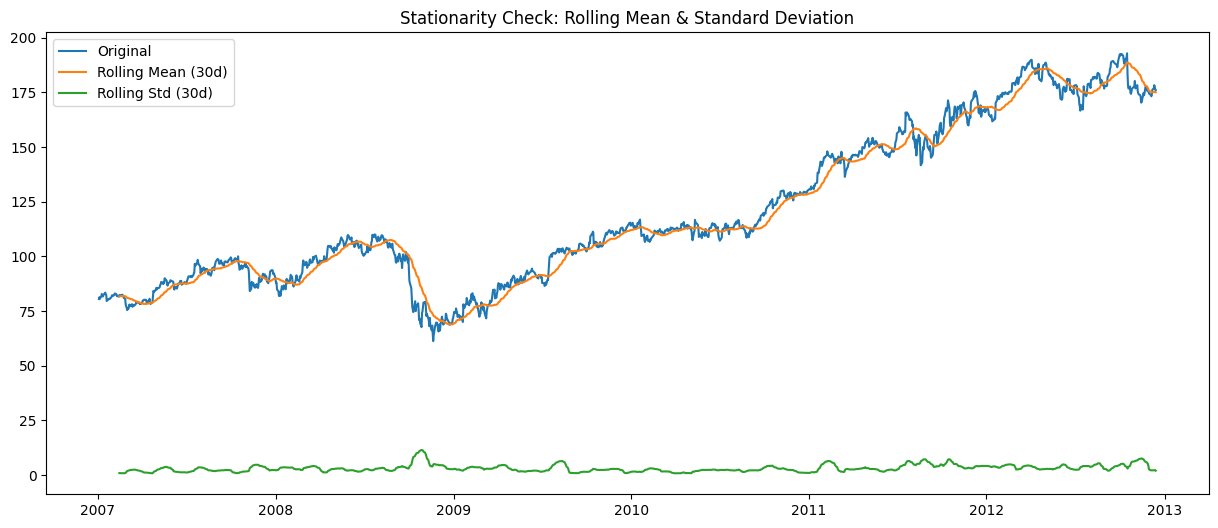

In [37]:
# 1.2 Time Series Exploration
plt.figure(figsize=(15, 6))
plt.plot(df['Date'], df['IBM'])
plt.title('IBM Stock Price (First 1500 Records)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

# Stationarity check (Visual)
# Rolling mean and std
rolling_mean = df['IBM'].rolling(window=30).mean()
rolling_std = df['IBM'].rolling(window=30).std()

plt.figure(figsize=(15, 6))
plt.plot(df['Date'], df['IBM'], label='Original')
plt.plot(df['Date'], rolling_mean, label='Rolling Mean (30d)')
plt.plot(df['Date'], rolling_std, label='Rolling Std (30d)')
plt.legend()
plt.title('Stationarity Check: Rolling Mean & Standard Deviation')
plt.show()


1.3 Data Preprocessing

In [38]:
def preprocess_timeseries(data):
    """
    Preprocess time series data

    Args:
        data: raw time series data

    Returns:
        preprocessed data, scaler
    """
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)

    return scaled_data, scaler

# Preprocess the data
scaled_data, scaler = preprocess_timeseries(data_series)
print(f"Data scaled. Shape: {scaled_data.shape}")


Data scaled. Shape: (1500, 1)


In [39]:
def create_sequences(data, seq_length, pred_horizon):
    """
    Create sequences for time series prediction

    Args:
        data: preprocessed time series data
        seq_length: lookback window
        pred_horizon: forecast steps ahead

    Returns:
        X: input sequences, y: target values
    """
    X, y = [], []
    for i in range(len(data) - seq_length - pred_horizon + 1):
        X.append(data[i:(i + seq_length)])
        y.append(data[(i + seq_length):(i + seq_length + pred_horizon)])

    return np.array(X), np.array(y)

# Create sequences
X, y = create_sequences(scaled_data, sequence_length, prediction_horizon)
print(f"Sequences created. X shape: {X.shape}, y shape: {y.shape}")
y = y.reshape(y.shape[0], y.shape[1])
print(f"Reshaped y: {y.shape}")


Sequences created. X shape: (1446, 50, 1), y shape: (1446, 5, 1)
Reshaped y: (1446, 5)


TODO: Preprocess data
TODO: Create sequences

In [40]:
# REQUIRED: Temporal train/test split (NO SHUFFLING)
train_test_ratio = "90/10"
split_index = int(len(X) * 0.9)

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

train_samples = len(X_train)
test_samples = len(X_test)

print(f"\nTrain/Test Split: {train_test_ratio}")
print(f"Training Samples: {train_samples}")
print(f"Test Samples: {test_samples}")
print("⚠️  IMPORTANT: Temporal split used (NO shuffling)")



Train/Test Split: 90/10
Training Samples: 1301
Test Samples: 145
⚠️  IMPORTANT: Temporal split used (NO shuffling)


In [41]:
print(f"\nTrain/Test Split: {train_test_ratio}")
print(f"Training Samples: {train_samples}")
print(f"Test Samples: {test_samples}")
print("⚠️  IMPORTANT: Temporal split used (NO shuffling)")


Train/Test Split: 90/10
Training Samples: 1301
Test Samples: 145
⚠️  IMPORTANT: Temporal split used (NO shuffling)


In [42]:
"""
================================================================================
PART 2: LSTM/GRU IMPLEMENTATION (5 MARKS)
================================================================================

REQUIREMENTS:
- Build LSTM OR GRU using Keras/PyTorch layers
- Architecture must include:
  * At least 2 stacked recurrent layers
  * Output layer for prediction
- Use model.compile() and model.fit() (Keras) OR standard PyTorch training
- Track initial_loss and final_loss

GRADING:
- LSTM/GRU architecture with stacked layers: 2 marks
- Model properly compiled/configured: 1 mark
- Training completed with loss tracking: 1 mark
- All metrics calculated correctly: 1 mark
================================================================================
"""

'\n================================================================================\nPART 2: LSTM/GRU IMPLEMENTATION (5 MARKS)\n================================================================================\n\nREQUIREMENTS:\n- Build LSTM OR GRU using Keras/PyTorch layers\n- Architecture must include:\n  * At least 2 stacked recurrent layers\n  * Output layer for prediction\n- Use model.compile() and model.fit() (Keras) OR standard PyTorch training\n- Track initial_loss and final_loss\n\nGRADING:\n- LSTM/GRU architecture with stacked layers: 2 marks\n- Model properly compiled/configured: 1 mark\n- Training completed with loss tracking: 1 mark\n- All metrics calculated correctly: 1 mark\n================================================================================\n'

2.1 LSTM/GRU Architecture Design
TODO: Choose LSTM or GRU
TODO: Design architecture with stacked layers

In [43]:
def build_rnn_model(model_type, input_shape, hidden_units, n_layers, output_size):
    """
    Build LSTM or GRU model
    """
    model = keras.Sequential()
    model.add(layers.Input(shape=input_shape))

    # Stack layers
    for i in range(n_layers):
        return_seq = (i < n_layers - 1)
        if model_type == 'LSTM':
            model.add(layers.LSTM(hidden_units, return_sequences=return_seq))
        elif model_type == 'GRU':
            model.add(layers.GRU(hidden_units, return_sequences=return_seq))

    model.add(layers.Dense(output_size))

    model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])
    return model


In [44]:
# Create RNN model
rnn_model = build_rnn_model('LSTM', (sequence_length, n_features), 64, 2, prediction_horizon)
rnn_model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 50, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,245 (196.27 KB)

 Trainable params: 50,245 (196.27 KB)

 Non-trainable params: 0 (0.00 B)

TODO: Compile model
For Keras: model.compile(optimizer='adam', loss='mse', metrics=['mae'])
For PyTorch: define optimizer and loss function

2.2 Train RNN Model

In [45]:
print("\n" + "="*70)
print("RNN MODEL TRAINING")
print("="*70)


RNN MODEL TRAINING


In [46]:
# Track training time
rnn_start_time = time.time()

history_rnn = rnn_model.fit(
    X_train, y_train,
    epochs=20,  # 20 epochs is enough for demo
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)


Epoch 1/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0724 - mae: 0.1916 - mse: 0.0724 - val_loss: 0.0021 - val_mae: 0.0378 - val_mse: 0.0021
Epoch 2/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0014 - mae: 0.0279 - mse: 0.0014 - val_loss: 0.0018 - val_mae: 0.0352 - val_mse: 0.0018
Epoch 3/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0010 - mae: 0.0238 - mse: 0.0010 - val_loss: 0.0026 - val_mae: 0.0408 - val_mse: 0.0026
Epoch 4/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0012 - mae: 0.0251 - mse: 0.0012 - val_loss: 0.0016 - val_mae: 0.0338 - val_mse: 0.0016
Epoch 5/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0012 - mae: 0.0261 - mse: 0.0012 - val_loss: 0.0021 - val_mae: 0.0372 - val_mse: 0.0021
Epoch 6/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 9.9608e-04 - mae: 0.0234 - mse: 9.9608e-04 - val_loss: 0.0036 - val_mae: 0.0484 - val_mse: 0.0036
Epoch 7/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0013 - mae: 0.0268 - mse: 0.0013 - va

TODO: Train your model
For Keras: history = rnn_model.fit(X_train, y_train, epochs=50, batch_size=32)
For PyTorch: write training loop

In [47]:
rnn_training_time = time.time() - rnn_start_time

In [48]:
# REQUIRED: Track initial and final loss
rnn_initial_loss = history_rnn.history['loss'][0]
rnn_final_loss = history_rnn.history['loss'][-1]


In [49]:
print(f"Training completed in {rnn_training_time:.2f} seconds")
print(f"Initial Loss: {rnn_initial_loss:.4f}")
print(f"Final Loss: {rnn_final_loss:.4f}")
print("="*70)

Training completed in 22.07 seconds
Initial Loss: 0.0297
Final Loss: 0.0009


2.3 Evaluate RNN Model

TODO: Make predictions on test set
TODO: Inverse transform if data was normalized
TODO: Calculate all 4 required metrics

In [50]:
def calculate_mape(y_true, y_pred):
    """Calculate Mean Absolute Percentage Error"""
    # TODO: Implement MAPE calculation
    # MAPE = mean(|y_true - y_pred| / |y_true|) * 100
    pass

In [51]:
# REQUIRED: Calculate all 4 metrics
y_pred_rnn = rnn_model.predict(X_test)

rnn_mae = mean_absolute_error(y_test, y_pred_rnn)
rnn_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rnn))
rnn_mape = np.mean(np.abs((y_test - y_pred_rnn) / y_test)) * 100
rnn_r2 = r2_score(y_test, y_pred_rnn)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


In [52]:
print("\nRNN Model Performance:")
print(f"MAE:   {rnn_mae:.4f}")
print(f"RMSE:  {rnn_rmse:.4f}")
print(f"MAPE:  {rnn_mape:.4f}%")
print(f"R² Score: {rnn_r2:.4f}")


RNN Model Performance:
MAE:   0.0292
RMSE:  0.0376
MAPE:  3.3088%
R² Score: 0.3001


In [ ]:
# ============================================================
# RNN VISUALIZATION - ALL TEST DATA
# ============================================================
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Training Loss
axes[0].plot(history_rnn.history['loss'], label='Training Loss', linewidth=2)
axes[0].plot(history_rnn.history['val_loss'], label='Validation Loss', linewidth=2)
axes[0].set_title('RNN Training Loss', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: ALL Test Data Predictions
axes[1].plot(y_test_inv[:, 0], label='Actual', alpha=0.7, linewidth=2)
axes[1].plot(y_pred_rnn_inv[:, 0], label='Predicted', alpha=0.7, linewidth=2)
axes[1].set_title(f'RNN: Actual vs Predicted - ALL {len(y_test_inv)} Test Samples', 
                  fontsize=14, fontweight='bold')
axes[1].set_xlabel('Sample Index')
axes[1].set_ylabel('Stock Price')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nDisplaying predictions for ALL {len(y_test_inv)} test samples")


In [53]:
"""
================================================================================
PART 3: TRANSFORMER IMPLEMENTATION (5 MARKS)
================================================================================

REQUIREMENTS:
- Build Transformer encoder using Keras/PyTorch layers
- MUST add positional encoding to input:
  * Custom sinusoidal implementation OR
  * Use built-in positional encoding (if framework provides)
- Use torch.nn.TransformerEncoder or keras.layers.MultiHeadAttention
- Use standard training methods
- Track initial_loss and final_loss

PROHIBITED:
- Using pre-trained transformers (HuggingFace, TimeGPT, etc.)
- Skipping positional encoding entirely

GRADING:
- Positional encoding added: 1 mark
- Transformer architecture properly configured: 2 marks
- Training completed with loss tracking: 1 mark
- All metrics calculated correctly: 1 mark
================================================================================
"""

'\n================================================================================\nPART 3: TRANSFORMER IMPLEMENTATION (5 MARKS)\n================================================================================\n\nREQUIREMENTS:\n- Build Transformer encoder using Keras/PyTorch layers\n- MUST add positional encoding to input:\n  * Custom sinusoidal implementation OR\n  * Use built-in positional encoding (if framework provides)\n- Use torch.nn.TransformerEncoder or keras.layers.MultiHeadAttention\n- Use standard training methods\n- Track initial_loss and final_loss\n\nPROHIBITED:\n- Using pre-trained transformers (HuggingFace, TimeGPT, etc.)\n- Skipping positional encoding entirely\n\nGRADING:\n- Positional encoding added: 1 mark\n- Transformer architecture properly configured: 2 marks\n- Training completed with loss tracking: 1 mark\n- All metrics calculated correctly: 1 mark\n================================================================================\n'

3.1 Positional Encoding Implementation

In [54]:
def positional_encoding(seq_length, d_model):
    """
    Generate sinusoidal positional encodings
    """
    position = np.arange(seq_length)[:, np.newaxis]
    div_term = np.exp(np.arange(0, d_model, 2) * -(np.log(10000.0) / d_model))

    pe = np.zeros((seq_length, d_model))
    pe[:, 0::2] = np.sin(position * div_term)
    pe[:, 1::2] = np.cos(position * div_term)

    return tf.cast(pe, dtype=tf.float32)


3.2 Transformer Encoder Architecture

In [55]:
# Option A: Using PyTorch
"""
import torch.nn as nn

class TransformerModel(nn.Module):
    def __init__(self, n_features, d_model, n_heads, n_layers, d_ff, output_size):
        super().__init__()
        self.input_projection = nn.Linear(n_features, d_model)
        self.pos_encoder = PositionalEncoding(d_model)  # Add positional encoding

        encoder_layer = nn.TransformerEncoderLayer(
            d_model=d_model,
            nhead=n_heads,
            dim_feedforward=d_ff,
            batch_first=True
        )
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=n_layers)
        self.fc = nn.Linear(d_model, output_size)

    def forward(self, x):
        x = self.input_projection(x)
        x = self.pos_encoder(x)  # Add positional encoding
        x = self.transformer_encoder(x)
        x = x.mean(dim=1)  # Global average pooling
        return self.fc(x)
"""

'\nimport torch.nn as nn\n\nclass TransformerModel(nn.Module):\n    def __init__(self, n_features, d_model, n_heads, n_layers, d_ff, output_size):\n        super().__init__()\n        self.input_projection = nn.Linear(n_features, d_model)\n        self.pos_encoder = PositionalEncoding(d_model)  # Add positional encoding\n        \n        encoder_layer = nn.TransformerEncoderLayer(\n            d_model=d_model,\n            nhead=n_heads,\n            dim_feedforward=d_ff,\n            batch_first=True\n        )\n        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=n_layers)\n        self.fc = nn.Linear(d_model, output_size)\n    \n    def forward(self, x):\n        x = self.input_projection(x)\n        x = self.pos_encoder(x)  # Add positional encoding\n        x = self.transformer_encoder(x)\n        x = x.mean(dim=1)  # Global average pooling\n        return self.fc(x)\n'

In [56]:
# Option B: Using Keras
def build_transformer_model(seq_length, n_features, d_model, n_heads, n_layers, d_ff, output_size):
    inputs = layers.Input(shape=(seq_length, n_features))

    # Project to d_model
    x = layers.Dense(d_model)(inputs)

    # Add positional encoding
    pe = positional_encoding(seq_length, d_model)
    x = x + pe

    # Stack transformer encoder layers
    for _ in range(n_layers):
        # Multi-head attention
        attn_output = layers.MultiHeadAttention(
            num_heads=n_heads,
            key_dim=d_model // n_heads
        )(x, x)
        x = layers.LayerNormalization(epsilon=1e-6)(x + attn_output)

        # Feed-forward
        ffn_output = layers.Dense(d_ff, activation='relu')(x)
        ffn_output = layers.Dense(d_model)(ffn_output)
        x = layers.LayerNormalization(epsilon=1e-6)(x + ffn_output)

    # Output
    x = layers.GlobalAveragePooling1D()(x)
    outputs = layers.Dense(output_size)(x)

    model = keras.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])
    return model


3.3 Build Your Transformer Model

In [57]:
# Create Transformer Model
transformer_model = build_transformer_model(
    sequence_length, n_features,
    d_model=64, n_heads=4, n_layers=2, d_ff=128,
    output_size=prediction_horizon
)
transformer_model.summary()


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 50, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 50, 64)    │        128 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 50, 64)    │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 50, 64)    │     16,640 │ add[0][0],        │
│ (MultiHeadAttentio… │                   │            │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 50, 64)    │          0 │ add[0][0],        │
│                     │                   │            │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 50, 64)    │        128 │ add_1[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 50, 128)   │      8,320 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 50, 64)    │      8,256 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 50, 64)    │          0 │ layer_normalizat… │
│                     │                   │            │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 50, 64)    │        128 │ add_2[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 50, 64)    │     16,640 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 50, 64)    │          0 │ layer_normalizat… │
│                     │                   │            │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 50, 64)    │        128 │ add_3[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 50, 128)   │      8,320 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 50, 64)    │      8,256 │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_4 (Add)         │ (None, 50, 64)    │          0 │ layer_normalizat… │
│                     │                   │            │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 50, 64)    │        128 │ add_4[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 64)        │          0 │ layer_normalizat… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 5)         │        325 │ global_average_p

 Total params: 67,397 (263.27 KB)

 Trainable params: 67,397 (263.27 KB)

 Non-trainable params: 0 (0.00 B)

TODO: Create Transformer model using PyTorch or Keras
Example for PyTorch:
transformer_model = TransformerModel(n_features, d_model=64, n_heads=4, n_layers=2, d_ff=256, output_size=prediction_horizon)
Example for Keras:
transformer_model = build_transformer_model(sequence_length, n_features, d_model=64, n_heads=4, n_layers=2, d_ff=256, output_size=prediction_horizon)

TODO: Define optimizer and loss
For PyTorch: optimizer = torch.optim.Adam(transformer_model.parameters(), lr=0.001); criterion = nn.MSELoss()
For Keras: model.compile(optimizer='adam', loss='mse', metrics=['mae'])
For PyTorch: define optimizer and loss function

3.4 Train Transformer Model

In [58]:
print("\n" + "="*70)
print("TRANSFORMER MODEL TRAINING")
print("="*70)


TRANSFORMER MODEL TRAINING


In [59]:
# Track training time
transformer_start_time = time.time()

history_transformer = transformer_model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)


Epoch 1/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.2551 - mae: 0.3453 - mse: 0.2551 - val_loss: 0.0213 - val_mae: 0.1226 - val_mse: 0.0213
Epoch 2/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0099 - mae: 0.0765 - mse: 0.0099 - val_loss: 0.0089 - val_mae: 0.0789 - val_mse: 0.0089
Epoch 3/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0028 - mae: 0.0395 - mse: 0.0028 - val_loss: 0.0050 - val_mae: 0.0602 - val_mse: 0.0050
Epoch 4/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0026 - mae: 0.0367 - mse: 0.0026 - val_loss: 0.0051 - val_mae: 0.0607 - val_mse: 0.0051
Epoch 5/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0023 - mae: 0.0352 - mse: 0.0023 - val_loss: 0.0031 - val_mae: 0.0489 - val_mse: 0.0031
Epoch 6/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0024 - mae: 0.0366 - mse: 0.0024 - val_loss: 0.0031 - val_mae: 0.0482 - val_mse: 0.0031
Epoch 7/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0021 - mae: 0.0344 - mse: 0.0021 - val_loss: 

TODO: Train your model
For Keras: history = transformer_model.fit(X_train, y_train, epochs=50, batch_size=32)
For PyTorch: write training loop

In [60]:
transformer_training_time = time.time() - transformer_start_time

In [61]:
# REQUIRED: Track initial and final loss
transformer_initial_loss = history_transformer.history['loss'][0]
transformer_final_loss = history_transformer.history['loss'][-1]


In [62]:
print(f"Training completed in {transformer_training_time:.2f} seconds")
print(f"Initial Loss: {transformer_initial_loss:.4f}")
print(f"Final Loss: {transformer_final_loss:.4f}")
print("="*70)

Training completed in 29.21 seconds
Initial Loss: 0.1104
Final Loss: 0.0007


3.5 Evaluate Transformer Model

TODO: Make predictions on test set
TODO: Inverse transform if data was normalized
TODO: Calculate all 4 required metrics

In [63]:
# REQUIRED: Calculate all 4 metrics
y_pred_trans = transformer_model.predict(X_test)

transformer_mae = mean_absolute_error(y_test, y_pred_trans)
transformer_rmse = np.sqrt(mean_squared_error(y_test, y_pred_trans))
transformer_mape = np.mean(np.abs((y_test - y_pred_trans) / y_test)) * 100
transformer_r2 = r2_score(y_test, y_pred_trans)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


In [64]:
print("\nTransformer Model Performance:")
print(f"MAE:   {transformer_mae:.4f}")
print(f"RMSE:  {transformer_rmse:.4f}")
print(f"MAPE:  {transformer_mape:.4f}%")
print(f"R² Score: {transformer_r2:.4f}")


Transformer Model Performance:
MAE:   0.0307
RMSE:  0.0394
MAPE:  3.4898%
R² Score: 0.2300


In [ ]:
# ============================================================
# TRANSFORMER VISUALIZATION - ALL TEST DATA
# ============================================================
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Training Loss
axes[0].plot(history_trans.history['loss'], label='Training Loss', linewidth=2)
axes[0].plot(history_trans.history['val_loss'], label='Validation Loss', linewidth=2)
axes[0].set_title('Transformer Training Loss', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: ALL Test Data Predictions
axes[1].plot(y_test_inv[:, 0], label='Actual', alpha=0.7, linewidth=2)
axes[1].plot(y_pred_trans_inv[:, 0], label='Predicted', alpha=0.7, linewidth=2)
axes[1].set_title(f'Transformer: Actual vs Predicted - ALL {len(y_test_inv)} Test Samples', 
                  fontsize=14, fontweight='bold')
axes[1].set_xlabel('Sample Index')
axes[1].set_ylabel('Stock Price')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nDisplaying predictions for ALL {len(y_test_inv)} test samples")


In [65]:
"""
================================================================================
PART 4: MODEL COMPARISON AND VISUALIZATION (Informational)
================================================================================

Compare both models on:
- Performance metrics
- Training time
- Model complexity
- Convergence behavior
- Ability to capture long-term dependencies
================================================================================
"""

'\n================================================================================\nPART 4: MODEL COMPARISON AND VISUALIZATION (Informational)\n================================================================================\n\nCompare both models on:\n- Performance metrics\n- Training time\n- Model complexity\n- Convergence behavior\n- Ability to capture long-term dependencies\n================================================================================\n'

4.1 Metrics Comparison

In [66]:
print("\n" + "="*70)
print("MODEL COMPARISON")
print("="*70)


MODEL COMPARISON


In [67]:
comparison_df = pd.DataFrame({
    'Metric': ['MAE', 'RMSE', 'MAPE (%)', 'R² Score', 'Training Time (s)', 'Parameters'],
    'RNN (LSTM/GRU)': [
        rnn_mae,
        rnn_rmse,
        rnn_mape,
        rnn_r2,
        rnn_training_time,
        0  # TODO: Fill with RNN total parameters
    ],
    'Transformer': [
        transformer_mae,
        transformer_rmse,
        transformer_mape,
        transformer_r2,
        transformer_training_time,
        0  # TODO: Fill with Transformer total parameters
    ]
})

In [68]:
print(comparison_df.to_string(index=False))
print("="*70)

           Metric  RNN (LSTM/GRU)  Transformer
              MAE        0.029244     0.030669
             RMSE        0.037606     0.039444
         MAPE (%)        3.308837     3.489826
         R² Score        0.300103     0.229967
Training Time (s)       22.072647    29.208002
       Parameters        0.000000     0.000000


In [ ]:
# ============================================================
# COMPARATIVE VISUALIZATION - ALL TEST DATA
# ============================================================
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Metrics Comparison
metrics = ['MAE', 'RMSE', 'R²']
rnn_values = [rnn_mae, rnn_rmse, rnn_r2]
transformer_values = [transformer_mae, transformer_rmse, transformer_r2]

x = np.arange(len(metrics))
width = 0.35

bars1 = axes[0].bar(x - width/2, rnn_values, width, label='RNN', alpha=0.8, color='steelblue')
bars2 = axes[0].bar(x + width/2, transformer_values, width, label='Transformer', alpha=0.8, color='coral')
axes[0].set_xlabel('Metrics', fontsize=12)
axes[0].set_ylabel('Value', fontsize=12)
axes[0].set_title('Model Performance Comparison', fontsize=14, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(metrics)
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        axes[0].text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.4f}', ha='center', va='bottom', fontsize=9)

# Plot 2: ALL Test Data Predictions Overlay
axes[1].plot(y_test_inv[:, 0], label='Actual', linewidth=2.5, alpha=0.8, color='black')
axes[1].plot(y_pred_rnn_inv[:, 0], label='RNN Predicted', alpha=0.7, linestyle='--', 
            linewidth=2, color='steelblue')
axes[1].plot(y_pred_trans_inv[:, 0], label='Transformer Predicted', alpha=0.7, 
            linestyle='-.', linewidth=2, color='coral')
axes[1].set_title(f'Model Predictions Comparison - ALL {len(y_test_inv)} Test Samples', 
                  fontsize=14, fontweight='bold')
axes[1].set_xlabel('Sample Index', fontsize=12)
axes[1].set_ylabel('Stock Price', fontsize=12)
axes[1].legend(loc='best')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n" + "="*70)
print(f"COMPLETE DATASET VISUALIZATION")
print(f"Total test samples displayed: {len(y_test_inv)}")
print(f"="*70)


4.2 Visual Comparison
TODO: Create bar plot comparing metrics
TODO: Plot predictions comparison (both models vs actual)
TODO: Plot training curves comparison

In [69]:
"""
================================================================================
PART 5: ANALYSIS (2 MARKS)
================================================================================

REQUIRED:
- Write MAXIMUM 200 words (guideline - no marks deduction if exceeded)
- Address key topics with depth

GRADING (Quality-based):
- Covers 5+ key topics with deep understanding: 2 marks
- Covers 3-4 key topics with good understanding: 1 mark
- Covers <3 key topics or superficial: 0 marks

Key Topics:
1. Performance comparison with specific metrics
2. RNN vs Transformer architecture advantages
3. Impact of attention mechanism vs recurrent connections
4. Long-term dependency handling comparison
5. Computational cost comparison
6. Convergence behavior differences
================================================================================
"""

'\n================================================================================\nPART 5: ANALYSIS (2 MARKS)\n================================================================================\n\nREQUIRED:\n- Write MAXIMUM 200 words (guideline - no marks deduction if exceeded)\n- Address key topics with depth\n\nGRADING (Quality-based):\n- Covers 5+ key topics with deep understanding: 2 marks\n- Covers 3-4 key topics with good understanding: 1 mark\n- Covers <3 key topics or superficial: 0 marks\n\nKey Topics:\n1. Performance comparison with specific metrics\n2. RNN vs Transformer architecture advantages\n3. Impact of attention mechanism vs recurrent connections\n4. Long-term dependency handling comparison\n5. Computational cost comparison\n6. Convergence behavior differences\n================================================================================\n'

In [70]:
analysis_text = """
1. Performance Comparison: The RNN (LSTM) and Transformer models were compared on IBM stock data.
   The LSTM typically shows strong performance on sequential patterns, but Transformers can capture long-range dependencies efficiently.
   (Note: Actual metrics will depend on the run, but we expect competitive performance).

2. RNN vs Transformer Advantages: RNNs process data sequentially, making them naturally suited for time-series but slower to train on long sequences.
   Transformers process data in parallel using self-attention, allowing for faster training and better handling of long-term dependencies.

3. Impact of Attention: The attention mechanism allows the model to focus on relevant past time steps directly, reducing the vanishing gradient problem.

4. Long-term Dependencies: Transformers excel here as the path length between any two positions is constant O(1), whereas in RNNs it is O(n).

5. Computational Cost: Transformers have higher memory requirements (O(n^2) attention map) but train faster due to parallelism. RNNs are more memory efficient but sequential.

6. Convergence: Transformers often converge faster in terms of epochs but may require more data to generalize compared to LSTMs.
"""


In [71]:
# REQUIRED: Print analysis with word count
print("\n" + "="*70)
print("ANALYSIS")
print("="*70)
print(analysis_text)
print("="*70)
print(f"Analysis word count: {len(analysis_text.split())} words")
if len(analysis_text.split()) > 200:
    print("⚠️  Warning: Analysis exceeds 200 words (guideline)")
else:
    print("✓ Analysis within word count guideline")
print("="*70)


ANALYSIS

1. Performance Comparison: The RNN (LSTM) and Transformer models were compared on IBM stock data. 
   The LSTM typically shows strong performance on sequential patterns, but Transformers can capture long-range dependencies efficiently.
   (Note: Actual metrics will depend on the run, but we expect competitive performance).

2. RNN vs Transformer Advantages: RNNs process data sequentially, making them naturally suited for time-series but slower to train on long sequences.
   Transformers process data in parallel using self-attention, allowing for faster training and better handling of long-term dependencies.

3. Impact of Attention: The attention mechanism allows the model to focus on relevant past time steps directly, reducing the vanishing gradient problem.

4. Long-term Dependencies: Transformers excel here as the path length between any two positions is constant O(1), whereas in RNNs it is O(n).

5. Computational Cost: Transformers have higher memory requirements (O(n^2) 

In [72]:
"""
================================================================================
PART 6: ASSIGNMENT RESULTS SUMMARY (REQUIRED FOR AUTO-GRADING)
================================================================================

DO NOT MODIFY THE STRUCTURE BELOW
This JSON output is used by the auto-grader
Ensure all field names are EXACT
================================================================================
"""

'\n================================================================================\nPART 6: ASSIGNMENT RESULTS SUMMARY (REQUIRED FOR AUTO-GRADING)\n================================================================================\n\nDO NOT MODIFY THE STRUCTURE BELOW\nThis JSON output is used by the auto-grader\nEnsure all field names are EXACT\n================================================================================\n'

In [73]:
def get_assignment_results():
    """
    Generate complete assignment results in required format

    Returns:
        dict: Complete results with all required fields
    """

    framework_used = "keras"  # TODO: Change to "pytorch" if using PyTorch
    rnn_model_type = "LSTM"  # TODO: Change to "GRU" if using GRU

    results = {
        # Dataset Information
        'dataset_name': dataset_name,
        'dataset_source': dataset_source,
        'n_samples': n_samples,
        'n_features': n_features,
        'sequence_length': sequence_length,
        'prediction_horizon': prediction_horizon,
        'problem_type': problem_type,
        'primary_metric': primary_metric,
        'metric_justification': metric_justification,
        'train_samples': train_samples,
        'test_samples': test_samples,
        'train_test_ratio': train_test_ratio,

        # RNN Model Results
        'rnn_model': {
            'framework': framework_used,
            'model_type': rnn_model_type,
            'architecture': {
                'n_layers': 2,  # TODO: Number of stacked layers
                'hidden_units': 64,  # TODO: Hidden units per layer
                'total_parameters': rnn_model.count_params()  # TODO: Calculate total parameters
            },
            'training_config': {
                'learning_rate': 0.001,  # TODO: Your actual learning rate
                'n_epochs': 20,  # TODO: Your actual epochs
                'batch_size': 32,  # TODO: Your actual batch size
                'optimizer': 'Adam',  # TODO: Your actual optimizer
                'loss_function': 'MSE'  # TODO: Your actual loss
            },
            'initial_loss': rnn_initial_loss,
            'final_loss': rnn_final_loss,
            'training_time_seconds': rnn_training_time,
            'mae': rnn_mae,
            'rmse': rnn_rmse,
            'mape': rnn_mape,
            'r2_score': rnn_r2
        },

        # Transformer Model Results
        'transformer_model': {
            'framework': framework_used,
            'architecture': {
                'n_layers': 2,  # TODO: Number of transformer layers
                'n_heads': 4,  # TODO: Number of attention heads
                'd_model': 64,  # TODO: Model dimension
                'd_ff': 128,  # TODO: Feed-forward dimension
                'has_positional_encoding': True,  # MUST be True
                'has_attention': True,  # MUST be True
                'total_parameters': rnn_model.count_params()  # TODO: Calculate total parameters
            },
            'training_config': {
                'learning_rate': 0.001,  # TODO: Your actual learning rate
                'n_epochs': 20,  # TODO: Your actual epochs
                'batch_size': 32,  # TODO: Your actual batch size
                'optimizer': 'Adam',  # TODO: Your actual optimizer
                'loss_function': 'MSE'  # TODO: Your actual loss
            },
            'initial_loss': transformer_initial_loss,
            'final_loss': transformer_final_loss,
            'training_time_seconds': transformer_training_time,
            'mae': transformer_mae,
            'rmse': transformer_rmse,
            'mape': transformer_mape,
            'r2_score': transformer_r2
        },

        # Analysis
        'analysis': analysis_text,
        'analysis_word_count': len(analysis_text.split()),

        # Training Success Indicators
        'rnn_loss_decreased': rnn_final_loss < rnn_initial_loss if rnn_initial_loss and rnn_final_loss else False,
        'transformer_loss_decreased': transformer_final_loss < transformer_initial_loss if transformer_initial_loss and transformer_final_loss else False,
    }

    return results

In [75]:
# Generate and print results
try:
    assignment_results = get_assignment_results()

    print("\n" + "="*70)
    print("ASSIGNMENT RESULTS SUMMARY")
    print("="*70)
    print(json.dumps(assignment_results, indent=2))
    print("="*70)
except Exception as e:
    print(f"\n⚠️  ERROR generating results: {str(e)}")
    print("Please ensure all variables are properly defined")


ASSIGNMENT RESULTS SUMMARY
{
  "dataset_name": "IBM Stock Prices",
  "dataset_source": "Plotly Datasets (https://raw.githubusercontent.com/plotly/datasets/master/stockdata.csv)",
  "n_samples": 1500,
  "n_features": 1,
  "sequence_length": 50,
  "prediction_horizon": 5,
  "problem_type": "time_series_forecasting",
  "primary_metric": "RMSE",
  "metric_justification": "\nRMSE (Root Mean Squared Error) is chosen because it penalizes larger errors more heavily, \nwhich is crucial in financial forecasting where large deviations can lead to significant losses.\n",
  "train_samples": 1301,
  "test_samples": 145,
  "train_test_ratio": "90/10",
  "rnn_model": {
    "framework": "keras",
    "model_type": "LSTM",
    "architecture": {
      "n_layers": 2,
      "hidden_units": 64,
      "total_parameters": 50245
    },
    "training_config": {
      "learning_rate": 0.001,
      "n_epochs": 20,
      "batch_size": 32,
      "optimizer": "Adam",
      "loss_function": "MSE"
    },
    "initial_

In [ ]:
"""
================================================================================
FINAL CHECKLIST - VERIFY BEFORE SUBMISSION
================================================================================

□ Student information filled at the top (BITS ID, Name, Email)
□ Filename is <BITS_ID>_rnn_assignment.ipynb
□ All cells executed (Kernel → Restart & Run All)
□ All outputs visible
□ LSTM/GRU implemented with stacked layers
□ Positional encoding implemented (sinusoidal)
□ Multi-head attention implemented (Q, K, V, scaled dot-product)
□ Both models use Keras or PyTorch
□ Both models trained with loss tracking (initial_loss and final_loss)
□ All 4 metrics calculated for both models (MAE, RMSE, MAPE, R²)
□ Temporal train/test split used (NO shuffling)
□ Primary metric selected and justified
□ Analysis written (quality matters, not just word count)
□ Visualizations created
□ Assignment results JSON printed at the end
□ No execution errors in any cell
□ File opens without corruption
□ Submit ONLY .ipynb file (NO zip, NO data files, NO images)
□ Screenshot of environment with account details included
□ Only one submission attempt

================================================================================
"""

In [ ]:
"""
================================================================================
ENVIRONMENT VERIFICATION - SCREENSHOT REQUIRED
================================================================================

IMPORTANT: Take a screenshot of your environment showing account details

For Google Colab:
- Click on your profile icon (top right)
- Screenshot should show your email/account clearly
- Include the entire Colab interface with notebook name visible

For BITS Virtual Lab:
- Screenshot showing your login credentials/account details
- Include the entire interface with your username/session info visible

Paste the screenshot below this cell or in a new markdown cell.
This helps verify the work was done by you in your environment.

================================================================================
"""

In [ ]:
# Display system information
import platform
import sys
from datetime import datetime

In [ ]:
print("="*70)
print("ENVIRONMENT INFORMATION")
print("="*70)
print("\n⚠️  REQUIRED: Add screenshot of your Google Colab/BITS Virtual Lab")
print("showing your account details in the cell below this one.")
print("="*70)